In [7]:
!pip install brian2tools

No handles with labels found to put in legend.


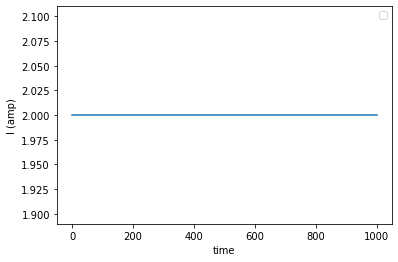

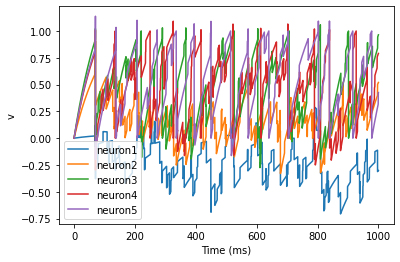

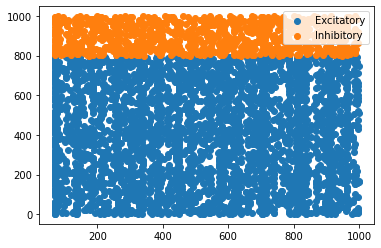

In [11]:
from brian2 import *
import random
start_scope()


eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
I = []

tau = [100] * 1000
for i in range(1000):
  I.append(random.random() * 2)

  
N = NeuronGroup(1000, eqs, threshold='v>1', reset='v = 0', method='exact')
exc = N[:800]
inh = N[800:]

exc.I = I[:800]
exc.tau = tau[:800]*ms
inh.I = I[800:]
inh.tau = tau[800:]*ms


Se = Synapses(exc, N, on_pre='v_post += 0.1')
Si = Synapses(inh, N, on_pre='v_post -= 0.2')

Se.connect(p=0.02)
Si.connect(p=0.05)

M = StateMonitor(exc, 'v', record=True)
exc_mon = SpikeMonitor(exc)
inh_mon = SpikeMonitor(inh)

run(1000*ms)

I = lambda x: 2
plt.plot(range(1000), list(map(I, range(1000))))
xlabel('time')
ylabel('I (amp)')
legend()

plt.show()

for i in range(5):
  plot(M.t/ms, M.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend(); 

plt.show()

plt.scatter(exc_mon.t/ms,
           exc_mon.i, label='Excitatory')
plt.scatter(inh_mon.t/ms,
           inh_mon.i+800, label='Inhibitory')
plt.legend()

plt.show()

No handles with labels found to put in legend.


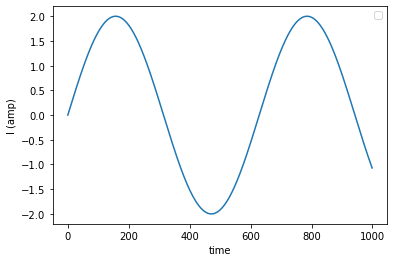

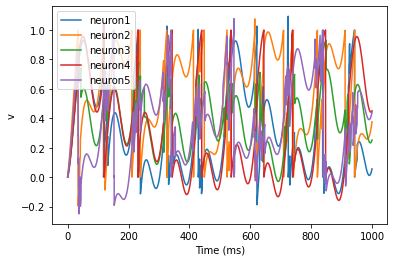

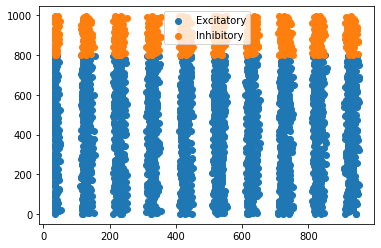

In [13]:
import math
start_scope()


eqs = '''
dv/dt = (I + 2 * sin(2*pi*10*Hz*t)-v)/tau : 1
I : 1
tau : second
'''
I = []

tau = [100] * 1000
for i in range(1000):
  I.append(random.random() * 2)

  
N = NeuronGroup(1000, eqs, threshold='v>1', reset='v = 0', method='euler')
exc = N[:800]
inh = N[800:]

exc.I = I[:800]
exc.tau = tau[:800]*ms
inh.I = I[800:]
inh.tau = tau[800:]*ms


Se = Synapses(exc, N, on_pre='v_post += 0.1')
Si = Synapses(inh, N, on_pre='v_post -= 0.2')

Se.connect(p=0.01)
Si.connect(p=0.04)

M = StateMonitor(exc, 'v', record=True)
exc_mon = SpikeMonitor(exc)
inh_mon = SpikeMonitor(inh)

run(1000*ms)

I = lambda x: 2 * math.sin(x/100)
plt.plot(range(1000), list(map(I, range(1000))))
xlabel('time')
ylabel('I (amp)')
legend()

plt.show() 

for i in range(5):
  plot(M.t/ms, M.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend(); 

plt.show()

plt.scatter(exc_mon.t/ms,
           exc_mon.i, label='Excitatory')
plt.scatter(inh_mon.t/ms,
           inh_mon.i+800, label='Inhibitory')
plt.legend()

plt.show()

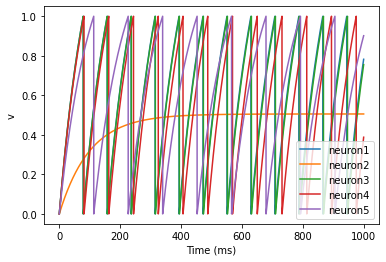

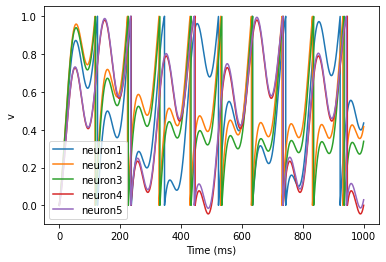

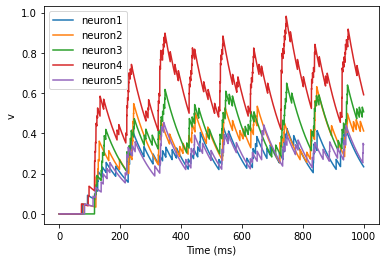

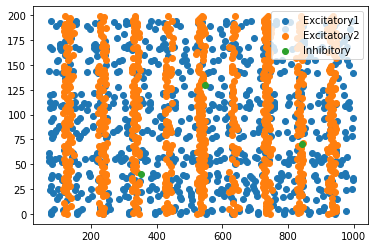

In [14]:
start_scope()


eqsx1 = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

eqsx2 = '''
dv/dt = (I + 0.5 + 1.5 * sin(2*pi*10*Hz*t)-v)/tau : 1
I : 1
tau : second
'''

eqsi = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

I1 = []
I2 = []
I3 = []
tau = []

for i in range(200):
  I1.append(random.random() * 2) 
  I2.append(random.random())
  I3.append(0)
for i in range(200):
  tau.append(100)
  
Gx1 = NeuronGroup(200, eqsx1, threshold='v>1', reset='v = 0', method='exact')
Gx2 = NeuronGroup(200, eqsx2, threshold='v>1', reset='v = 0', method='euler')
Gi = NeuronGroup(200, eqsi, threshold='v>1', reset='v = 0', method='exact')

Gx1.I = I1
Gx1.tau = tau*ms
Gx2.I = I2
Gx2.tau = tau*ms
Gi.I = I3
Gi.tau = tau*ms

Sei1 = Synapses(Gx1, Gi, on_pre='v_post += 0.05')
Sei2 = Synapses(Gx2, Gi, on_pre='v_post += 0.05')

Sei1.connect(p=0.05)
Sei2.connect(p=0.05)

exc1 = SpikeMonitor(Gx1)
exc2 = SpikeMonitor(Gx2)
inh = SpikeMonitor(Gi)

M1 = StateMonitor(Gx1, 'v', record=True)
M2 = StateMonitor(Gx2, 'v', record=True)
M3 = StateMonitor(Gi, 'v', record=True)

run(1000*ms)

for i in range(5):
  plot(M1.t/ms, M1.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend()
plt.show()

for i in range(5):
  plot(M2.t/ms, M2.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend()
plt.show()

for i in range(5):
  plot(M3.t/ms, M3.v[i], label='neuron' + str(i+1))

xlabel('Time (ms)')
ylabel('v')
legend()
plt.show()

plt.scatter(exc1.t/ms,
           exc1.i, label='Excitatory1')
plt.scatter(exc2.t/ms,
           exc2.i, label='Excitatory2')
plt.scatter(inh.t/ms,
           inh.i, label='Inhibitory')

plt.legend()
plt.show()